<a href="https://colab.research.google.com/github/DamodaraBarbosa/projeto_covid19_dio/blob/main/Projeto_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto COVID-19

Importando as bibliotecas 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

Definindo os parâmetros para o matplotlib

In [2]:
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.figsize'] = (12, 6)
parametros = {'axes.labelsize': 16, 'axes.titlesize': 25}
plt.rcParams.update(parametros)

Importando o arquivo .csv

In [3]:
covid19 = pd.read_csv('/content/covid_19_data.csv', parse_dates= ['ObservationDate', 'Last Update']) 
# já retorna as colunas no formato datetime

In [4]:
covid19.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.00,0.00,0.00
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.00,0.00,0.00
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.00,0.00,0.00
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.00,0.00,0.00
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.00,0.00,0.00


In [5]:
# as dimensões do dataframe:

covid19.shape

(26713, 8)

In [6]:
# já algumas informações sobre os dado:

covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26713 entries, 0 to 26712
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SNo              26713 non-null  int64         
 1   ObservationDate  26713 non-null  datetime64[ns]
 2   Province/State   12882 non-null  object        
 3   Country/Region   26713 non-null  object        
 4   Last Update      26713 non-null  datetime64[ns]
 5   Confirmed        26713 non-null  float64       
 6   Deaths           26713 non-null  float64       
 7   Recovered        26713 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 1.6+ MB


Formatando informações do dataframe

In [7]:
# definindo função que usa regex para padronizar o nome das colunas:

import re

def formata_colunas(nome_coluna):
  return re.sub(r'[/| ]', '', nome_coluna).lower() # para colocar as letras minúsculas

In [8]:
colunas = list()

for coluna in covid19.columns:
  colunas.append(formata_colunas(coluna))

In [9]:
# outra forma:

# covid19.columns = [formata_colunas(coluna) for coluna in covid19.columns]

In [10]:
# definindo os nomes formatados das colunas:

covid19.columns = colunas

In [11]:
covid19.head()

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.00,0.00,0.00
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.00,0.00,0.00
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.00,0.00,0.00
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.00,0.00,0.00
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.00,0.00,0.00


## Análise exploratória dos dados referentes ao Brasil

In [12]:
# países presentes na coluna 'coutryregion'

covid19['countryregion'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [13]:
# selecionando os dados referentes ao Brasil e instanciando-os em uma nova variável

covid_brazil = covid19.query('countryregion == "Brazil"')
covid_brazil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
82,83,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.00,0.00,0.00
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.00,0.00,0.00
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.00,0.00,0.00
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.00,0.00,0.00
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.00,0.00,0.00
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.00,14962.00,84970.00
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.00,15662.00,89672.00
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.00,16118.00,94122.00
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.00,16853.00,100459.00


In [14]:
# nomeando o index do dataframe:

covid_brazil.index.name = 'Index'
covid_brazil.head()

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
Index,,,,,,,,
82,83,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.00,0.00,0.00
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.00,0.00,0.00
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.00,0.00,0.00
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.00,0.00,0.00
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.00,0.00,0.00


In [15]:
# verificando a presença de dados no dataframe covid_brazil:

covid_brazil['provincestate'].unique()

array([nan], dtype=object)

In [16]:
# não há nenhum dado então opta-se por eliminar essa coluna:

covid_brazil.pop('provincestate')

Index
82       NaN
2455     NaN
2559     NaN
2668     NaN
2776     NaN
        ... 
24850    NaN
25227    NaN
25604    NaN
25981    NaN
26358    NaN
Name: provincestate, Length: 85, dtype: object

In [17]:
covid_brazil.tail()

,sno,observationdate,countryregion,lastupdate,confirmed,deaths,recovered
Index,,,,,,,
24850,24851,2020-05-15,Brazil,2020-05-16 02:32:19,220291.00,14962.00,84970.00
25227,25228,2020-05-16,Brazil,2020-05-17 02:32:32,233511.00,15662.00,89672.00
25604,25605,2020-05-17,Brazil,2020-05-18 02:32:21,241080.00,16118.00,94122.00
25981,25982,2020-05-18,Brazil,2020-05-19 02:32:18,255368.00,16853.00,100459.00
26358,26359,2020-05-19,Brazil,2020-05-20 02:32:19,271885.00,17983.00,106794.00


In [18]:
# pode-se selecionar também apenas as linhas em que já há casos confirmados de COVID-19:

brazil = covid19.query('countryregion == "Brazil" and confirmed > 0')
brazil.pop('provincestate')
brazil.head(10)

,sno,observationdate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2456,2020-02-26,Brazil,2020-02-26 23:53:02,1.00,0.00,0.00
2559,2560,2020-02-27,Brazil,2020-02-26 23:53:02,1.00,0.00,0.00
2668,2669,2020-02-28,Brazil,2020-02-26 23:53:02,1.00,0.00,0.00
2776,2777,2020-02-29,Brazil,2020-02-29 21:03:05,2.00,0.00,0.00
2903,2904,2020-03-01,Brazil,2020-02-29 21:03:05,2.00,0.00,0.00
3032,3033,2020-03-02,Brazil,2020-02-29 21:03:05,2.00,0.00,0.00
3173,3174,2020-03-03,Brazil,2020-02-29 21:03:05,2.00,0.00,0.00
3322,3323,2020-03-04,Brazil,2020-03-04 20:33:02,4.00,0.00,0.00
3486,3487,2020-03-05,Brazil,2020-03-04 20:33:02,4.00,0.00,0.00
3647,3648,2020-03-06,Brazil,2020-03-06 20:33:03,13.00,0.00,0.00


In [19]:
# organizando o index para o dataframe:

brazil.index.name = 'Index'
brazil.index = range(brazil.shape[0])
brazil.head()

,sno,observationdate,countryregion,lastupdate,confirmed,deaths,recovered
0,2456,2020-02-26,Brazil,2020-02-26 23:53:02,1.00,0.00,0.00
1,2560,2020-02-27,Brazil,2020-02-26 23:53:02,1.00,0.00,0.00
2,2669,2020-02-28,Brazil,2020-02-26 23:53:02,1.00,0.00,0.00
3,2777,2020-02-29,Brazil,2020-02-29 21:03:05,2.00,0.00,0.00
4,2904,2020-03-01,Brazil,2020-02-29 21:03:05,2.00,0.00,0.00


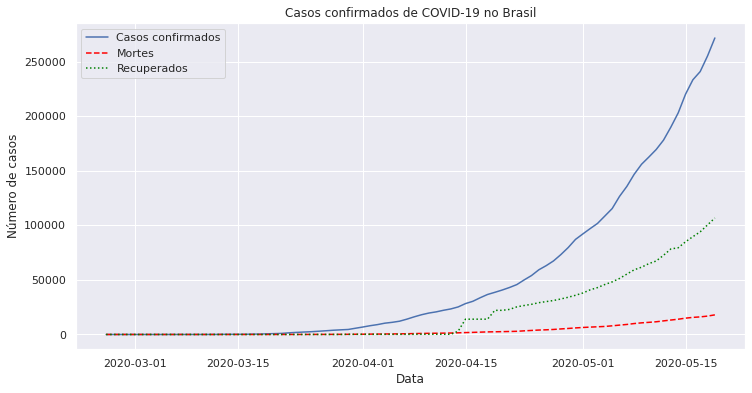

In [20]:
# gráfico no matplotlib:

sns.set()
plt.plot(brazil['observationdate'], brazil['confirmed'])
plt.plot(brazil['observationdate'], brazil['deaths'], color= 'red', linestyle= '--')
plt.plot(brazil['observationdate'], brazil['recovered'], color= 'green', linestyle= ':')
plt.xlabel('Data')
plt.ylabel('Número de casos')
plt.title('Casos confirmados de COVID-19 no Brasil')
plt.legend(['Casos confirmados', 'Mortes', 'Recuperados'])
plt.show()

In [21]:
# com o uso do plotly:

fig = px.line(
    brazil, 'observationdate', y = ['confirmed', 'deaths', 'recovered'], 
    title= 'Dados da COVID-19 no Brasil',
    labels= {'observationdate': 'Datas', 'value': 'Número de ocorrências'}
)
fig.update_layout(title_x= 0.5)
fig.show()


In [22]:
# os dados cobrem um período de quantos dias?

# primeiro realiza-se um tratamento para retirar as horas dos dados:

for index, data in enumerate(brazil['observationdate']):
  brazil.at[index, 'observationdate'] = data.date()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
brazil.dtypes

sno                         int64
observationdate            object
countryregion              object
lastupdate         datetime64[ns]
confirmed                 float64
deaths                    float64
recovered                 float64
dtype: object

In [24]:
# entre o primeiro e o último dia dos dados disponibilizados há um período de:

primeiro_dia = brazil.iloc[0]['observationdate']
ultimo_dia = brazil.iloc[-1]['observationdate']

dias = (ultimo_dia - primeiro_dia).days

f'Período de {dias} dias'

'Período de 83 dias'

In [25]:
# no período em que os dados cobrem foram:
# como os dados são acumulativos, é necessário obter os dados da última linha e realizar os cálculos

casos_por_dia = round(brazil.iloc[-1]['confirmed']/dias, 2)

f'A casos confirmados por dia foi de {casos_por_dia} casos'

'A casos confirmados por dia foi de 3275.72 casos'

In [26]:
mortes_por_dia = round(brazil.iloc[-1]['deaths']/dias, 2)

f'A média de mortes por dia foi de {mortes_por_dia} mortes'

'A média de mortes por dia foi de 216.66 mortes'

In [27]:
# definindo uma coluna com novos casos:

novos_casos = list()

for index, casos in enumerate(brazil['confirmed']):
  if index == 0:
    pass
  else:
    novo_caso = casos - brazil.iloc[index-1]['confirmed']
    novos_casos.append(novo_caso)

In [28]:
# a primeira linha não apresenta variação então deve 'newcases' deve ser 0:
brazil.at[0, 'newcases'] = 0

for index, casos in enumerate(novos_casos):
  brazil.at[index+1, 'newcases'] = novos_casos[index]
  

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
# dataframe com a coluna 'newcases' definida:
brazil.head()

,sno,observationdate,countryregion,lastupdate,confirmed,deaths,recovered,newcases
0,2456,2020-02-26,Brazil,2020-02-26 23:53:02,1.00,0.00,0.00,0.00
1,2560,2020-02-27,Brazil,2020-02-26 23:53:02,1.00,0.00,0.00,0.00
2,2669,2020-02-28,Brazil,2020-02-26 23:53:02,1.00,0.00,0.00,0.00
3,2777,2020-02-29,Brazil,2020-02-29 21:03:05,2.00,0.00,0.00,1.00
4,2904,2020-03-01,Brazil,2020-02-29 21:03:05,2.00,0.00,0.00,0.00


In [30]:
# pode-se definir também uma nova coluna com número de mortes entre um dia e outro:

novas_mortes = list()

for index, mortes in enumerate(brazil['deaths']):
  if index == 0:
    pass
  else:
    nova_morte = mortes - brazil.iloc[index-1]['deaths']
    novas_mortes.append(nova_morte)

In [31]:
# da mesma forma para a coluna 'newdeaths', como não há variação na primeira linha deve-se definir como valor 0
brazil.at[0, 'newdeaths'] = 0

for index, mortes in enumerate(novas_mortes):
  brazil.at[index+1, 'newdeaths'] = mortes


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
brazil.head()

,sno,observationdate,countryregion,lastupdate,confirmed,deaths,recovered,newcases,newdeaths
0,2456,2020-02-26,Brazil,2020-02-26 23:53:02,1.00,0.00,0.00,0.00,0.00
1,2560,2020-02-27,Brazil,2020-02-26 23:53:02,1.00,0.00,0.00,0.00,0.00
2,2669,2020-02-28,Brazil,2020-02-26 23:53:02,1.00,0.00,0.00,0.00,0.00
3,2777,2020-02-29,Brazil,2020-02-29 21:03:05,2.00,0.00,0.00,1.00,0.00
4,2904,2020-03-01,Brazil,2020-02-29 21:03:05,2.00,0.00,0.00,0.00,0.00


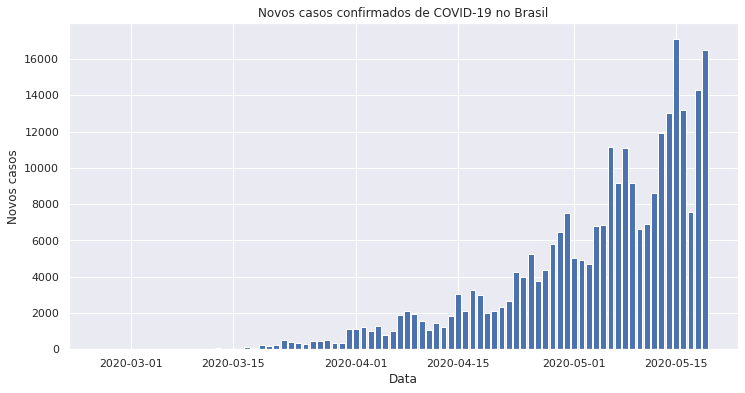

In [33]:
# usando o matplotlib:

plt.bar(brazil['observationdate'], brazil['newcases'])
plt.title('Novos casos confirmados de COVID-19 no Brasil')
plt.xlabel('Data')
plt.ylabel('Novos casos')
plt.show()

In [34]:
# usando o plotly:

fig = px.bar(
    brazil, 'observationdate', 'newcases',
    labels= {'observationdate': 'Data', 'newcases': 'Novos casos'},
    title= 'Novos casos da COVID-19 no Brasil'
)
fig.update_layout(title_x= 0.5)
fig.show()

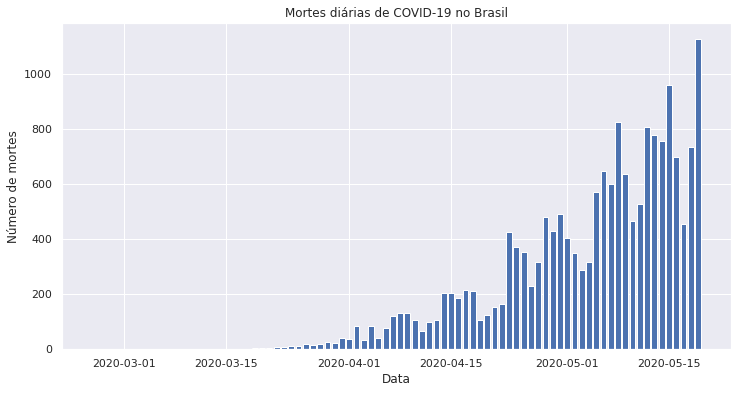

In [35]:
# usando o matplotlib:

plt.bar(brazil['observationdate'], brazil['newdeaths'])
plt.title('Mortes diárias de COVID-19 no Brasil')
plt.xlabel('Data')
plt.ylabel('Número de mortes')
plt.show()

In [36]:
# usando o plotly:

fig = px.bar(
    brazil, 'observationdate', 'newdeaths',
    title= 'Mortes diárias da COVID-19 no Brasil',
    labels= {'observationdate': 'Data', 'newdeaths': 'Número de mortes'}
)
fig.update_layout(title_x= 0.5)
fig.show()

In [37]:
# fig = px.scatter(brazil, 'observationdate', 'newcases', size= 'newdeaths')
# fig.show()

Plotando gráfico de dados da COVID-19 no Brasil com o plotly.graph_objects

In [38]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=brazil['observationdate'], y= brazil['deaths'], name= 'Mortes',
               mode= 'lines+markers', line= {'color': 'red'})
)
fig.add_trace(
    go.Scatter(x=brazil['observationdate'], y= brazil['confirmed'], name= 'Casos',
               mode= 'lines+markers', line= {'color': 'blue'})
)
fig.add_trace(
    go.Scatter(x=brazil['observationdate'], y= brazil['recovered'], name= 'Recuperados',
               mode= 'lines+markers', line= {'color': 'green'})
)
fig.update_layout(title= 'Dados da COVID-19 no Brasil', title_x= 0.5, xaxis_title= 'Data', yaxis_title= 'Número de ocorrências')
fig.show()

## Cálculo da taxa de crescimento dos números de casos da COVID-19 no Brasil

In [39]:
from math import pow

In [40]:
def taxa_crescimento(dados, variavel, inicio=None, fim=None):
  # definindo dados iniciais e finais:
  if inicio == None:
    selecao = dados[variavel] > 0
    inicio = dados[selecao].min()
  else:
    inicio = pd.to_datetime(inicio)

  if fim == None:
    fim = dados.iloc[-1]
  else:
    fim = pd.to_datetime(fim)

  # definindo os valores da variável desejada na data:
  valor_inicio = dados[dados['observationdate'] == inicio['observationdate']][variavel].values
  valor_fim = dados[dados['observationdate'] == fim['observationdate']][variavel].values

  # definindo a taxa de crescimento
  taxa = pow((valor_fim/valor_inicio), (1/(fim['observationdate'] - inicio['observationdate']).days)) - 1
  return taxa * 100

In [41]:
media_crescimento_casos = taxa_crescimento(brazil, 'confirmed')
f'A taxa média de crescimento diário de casos da COVID-19 no Brasil é de {media_crescimento_casos:.2f}%'

'A taxa média de crescimento diário de casos da COVID-19 no Brasil é de 16.27%'

In [42]:
media_crescimento_mortes = taxa_crescimento(brazil, 'deaths')
f'A taxa média de crescimento diário do nº de mortes por COVID-19 no Brasil é de {round(media_crescimento_mortes, 2)}%'

'A taxa média de crescimento diário do nº de mortes por COVID-19 no Brasil é de 16.83%'

## Cálculo da taxa de crescimento diário da COVID-19 no Brasil

In [43]:
import numpy as np

In [44]:
def taxa_crescimento_diario(dados, variavel, variavel_dependente):
  taxas = list()

  for index, valor in enumerate(dados[variavel]):
    try:
      taxa = (valor/dados[variavel_dependente][index-1])
      if (str(taxa)[0]).isdigit() == False:
        taxa = 0
        taxas.append(taxa)
      else:
        taxas.append(taxa)
    except (ValueError, KeyError) as error:
      pass  
  
  taxas = np.array(taxas) * 100
  return taxas

In [45]:
taxa_casos_diarios = taxa_crescimento_diario(brazil, 'newcases', 'confirmed')
taxa_mortes_diarias = taxa_crescimento_diario(brazil, 'newdeaths', 'deaths')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning:

divide by zero encountered in double_scalars



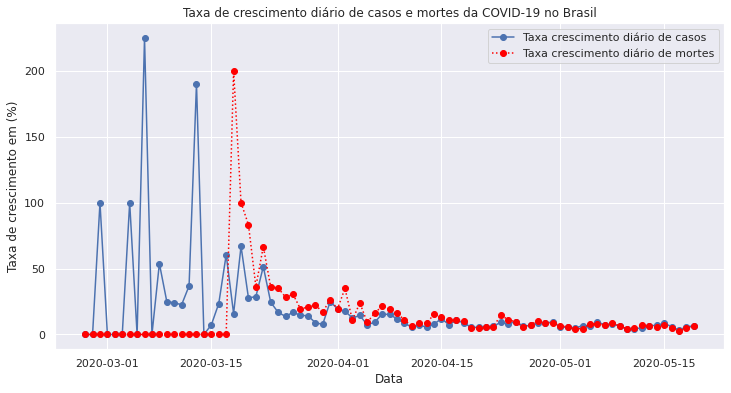

In [46]:
plt.plot(brazil['observationdate'][1:], taxa_casos_diarios, marker= 'o')
plt.plot(brazil['observationdate'][1:], taxa_mortes_diarias, color= 'red', linestyle= ':', marker= 'o')
plt.title('Taxa de crescimento diário de casos e mortes da COVID-19 no Brasil')
plt.legend(labels= ['Taxa crescimento diário de casos', 'Taxa crescimento diário de mortes'])
plt.ylabel('Taxa de crescimento em (%)')
plt.xlabel('Data')
plt.show()

In [47]:
# plotando o gráfico das taxas de crescimento com o plotly.go:

fig = go.Figure()
fig.add_trace(
    go.Scatter(x=brazil['observationdate'], y= taxa_casos_diarios, name= 'Taxa crescimento de casos diários',
               mode= 'lines+markers')
)
fig.add_trace(
    go.Scatter(x=brazil['observationdate'], y= taxa_mortes_diarias, name= 'Taxa crescimento de mortes diárias',
              mode= 'lines+markers', line= {'color': 'red'}, line_dash= 'dot')
)
fig.update_layout(title= 'Taxa de crescimento diário de casos e mortes da COVID-19 no Brasil', title_x = 0.5,
                  xaxis_title= 'Data', yaxis_title= 'Taxa de crescimento em (%)')
fig.show()

## Previsões

Importando a biblioteca statsmodels

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

Para os novos casos de COVID-19

In [49]:
novos_casos = brazil['newcases']
novos_casos.index = pd.date_range(start= brazil['observationdate'].min(), end= brazil['observationdate'].max())
# novos_casos.index = range(brazil['observationdate'].dt.min(), brazil['observationdate'].max())

In [50]:
res = seasonal_decompose(novos_casos)

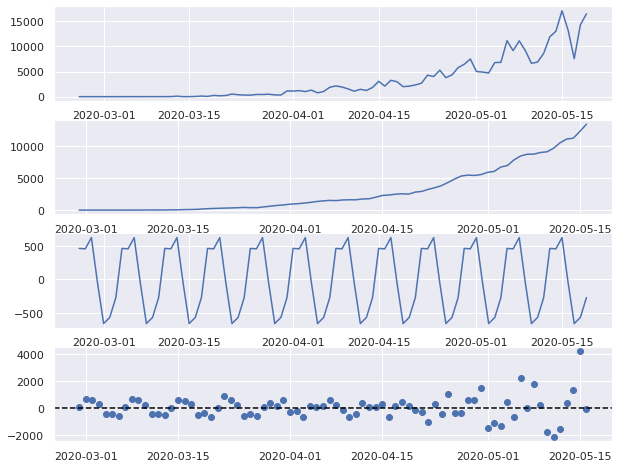

In [51]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize= (10, 8))

ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.scatter(novos_casos.index, res.resid)
plt.axhline(0, linestyle= 'dashed', color= 'black')
plt.show()

Para os casos confirmados

In [52]:
casos_confirmados = brazil['confirmed']
casos_confirmados.index = pd.date_range(start= brazil['observationdate'].min(), end= brazil['observationdate'].max())

In [53]:
res = seasonal_decompose(casos_confirmados)

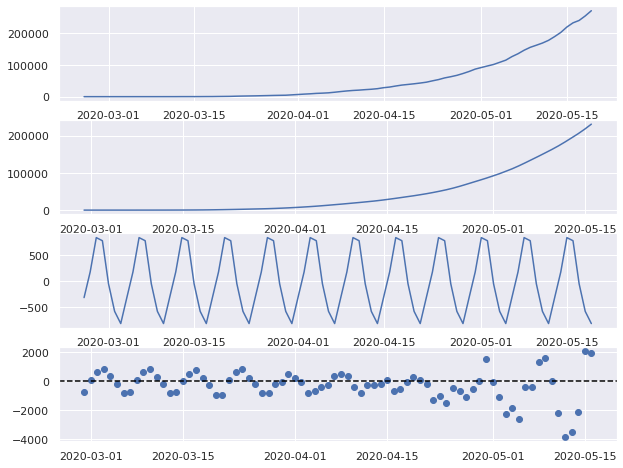

In [54]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize= (10, 8))
ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.scatter(casos_confirmados.index, res.resid)
ax4.axhline(0, linestyle= 'dashed', color= 'black')
plt.show()

## Uso do ARIMA 

In [55]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
from pmdarima.arima import auto_arima

In [59]:
modelo = auto_arima(casos_confirmados)

In [73]:
fig = go.Figure(
    go.Scatter(x= casos_confirmados.index, y= casos_confirmados, name= 'Observados')
)
fig.add_trace(
    go.Scatter(x= casos_confirmados.index, y= modelo.predict_in_sample(), name= 'Preditos')
)
fig.add_trace(
    go.Scatter(x= pd.date_range('2020-05-20', '2020-06-20'), y= modelo.predict(31), name= 'Forecast')
)
fig.update_layout(title= 'Previsão de casos confirmados no Brasil da COVID-19', title_x= 0.5)
fig.show()

## Modelo de crescimento

In [76]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 129 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6637998 sha256=dd722388b998bd30befc8364fd9750d61ae686d6e55101b9369922d4ee1010c9
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [77]:
from fbprophet import Prophet

In [81]:
# Realizando processamento:

train = novos_casos.reset_index()[:-5]
test = novos_casos.reset_index()[-5:]

# Renomeando colunas:

train.columns = ['ds', 'y']
test.columns = ['ds', 'y']

# Definição do modelo de crescimento:

profeta = Prophet(growth= 'logistic', changepoints= ['2020-03-21', '2020-03-30', '2020-04-25',
                                                     '2020-05-03', '2020-05-10'])

# pop = 212600000
pop = 1000000

train['cap'] = pop

# treinar o modelo:

profeta.fit(train)
future_dates = profeta.make_future_dataframe(periods= 200)
future_dates['cap'] = pop
forecast = profeta.predict(future_dates)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [82]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= forecast.ds, y= forecast.yhat, name= 'Predição'))
fig.add_trace(go.Scatter(x= train.ds, y= train.y, name= 'Observados - Treino'))
fig.update_layout(title= 'Predições de casos confirmados no Brasil')
fig.show()